# Task 1: Cardiovascular Disease Prediction Model Creation


### Objective:
To create a predictive model for identifying the risk of cardiovascular disease using the provided dataset. This task will involve Exploratory Data Analysis (EDA) followed by model development.


### Data Description
1. id: Unique identifier for each individual
2. age: Age of the individual in years
3. gender: Gender of the individual (1 - female, 2 - male)
4. height: Height of the individual in cm
5. weight: Weight of the individual in kg
6. ap_hi: Systolic blood pressure
7. ap_lo: Diastolic blood pressure
8. cholesterol: Cholesterol level (1 - normal, 2 - above normal, 3 - well above normal)
9. gluc: Glucose level (1 - normal, 2 - above normal, 3 - well above normal)
10. smoke: Smoking status (0 - non-smoker, 1 - smoker)
11. alco: Alcohol intake status (0 - non-drinker, 1 - drinker)
12. active: Physical activity level (0 - inactive, 1 - active)
13. cardio: Target variable indicating the presence or absence of cardiovascular disease (0 - no disease, 1 - disease)


### Import packages

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/home/supriya/Desktop/FDV/cvd_prediction/cardio.csv'

In [5]:
data = pd.read_csv(file_path, sep=';')

### EDA

In [7]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
3,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
4,8,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [9]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000
mean,49974.561153,19468.880995,1.349558,164.358915,74.204942,128.817092,96.630698,1.366830,1.226438,0.088118,0.053759,0.803720,0.499693
std,28850.066516,2467.204211,0.476834,8.209839,14.395578,154.014714,188.476564,0.680207,0.572242,0.283469,0.225544,0.397185,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25009.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50004.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74890.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   gender       69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  int64  
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [16]:
y = data['cardio']
X = data.drop(columns='cardio')

/home/supriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/supriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/supriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/supriya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

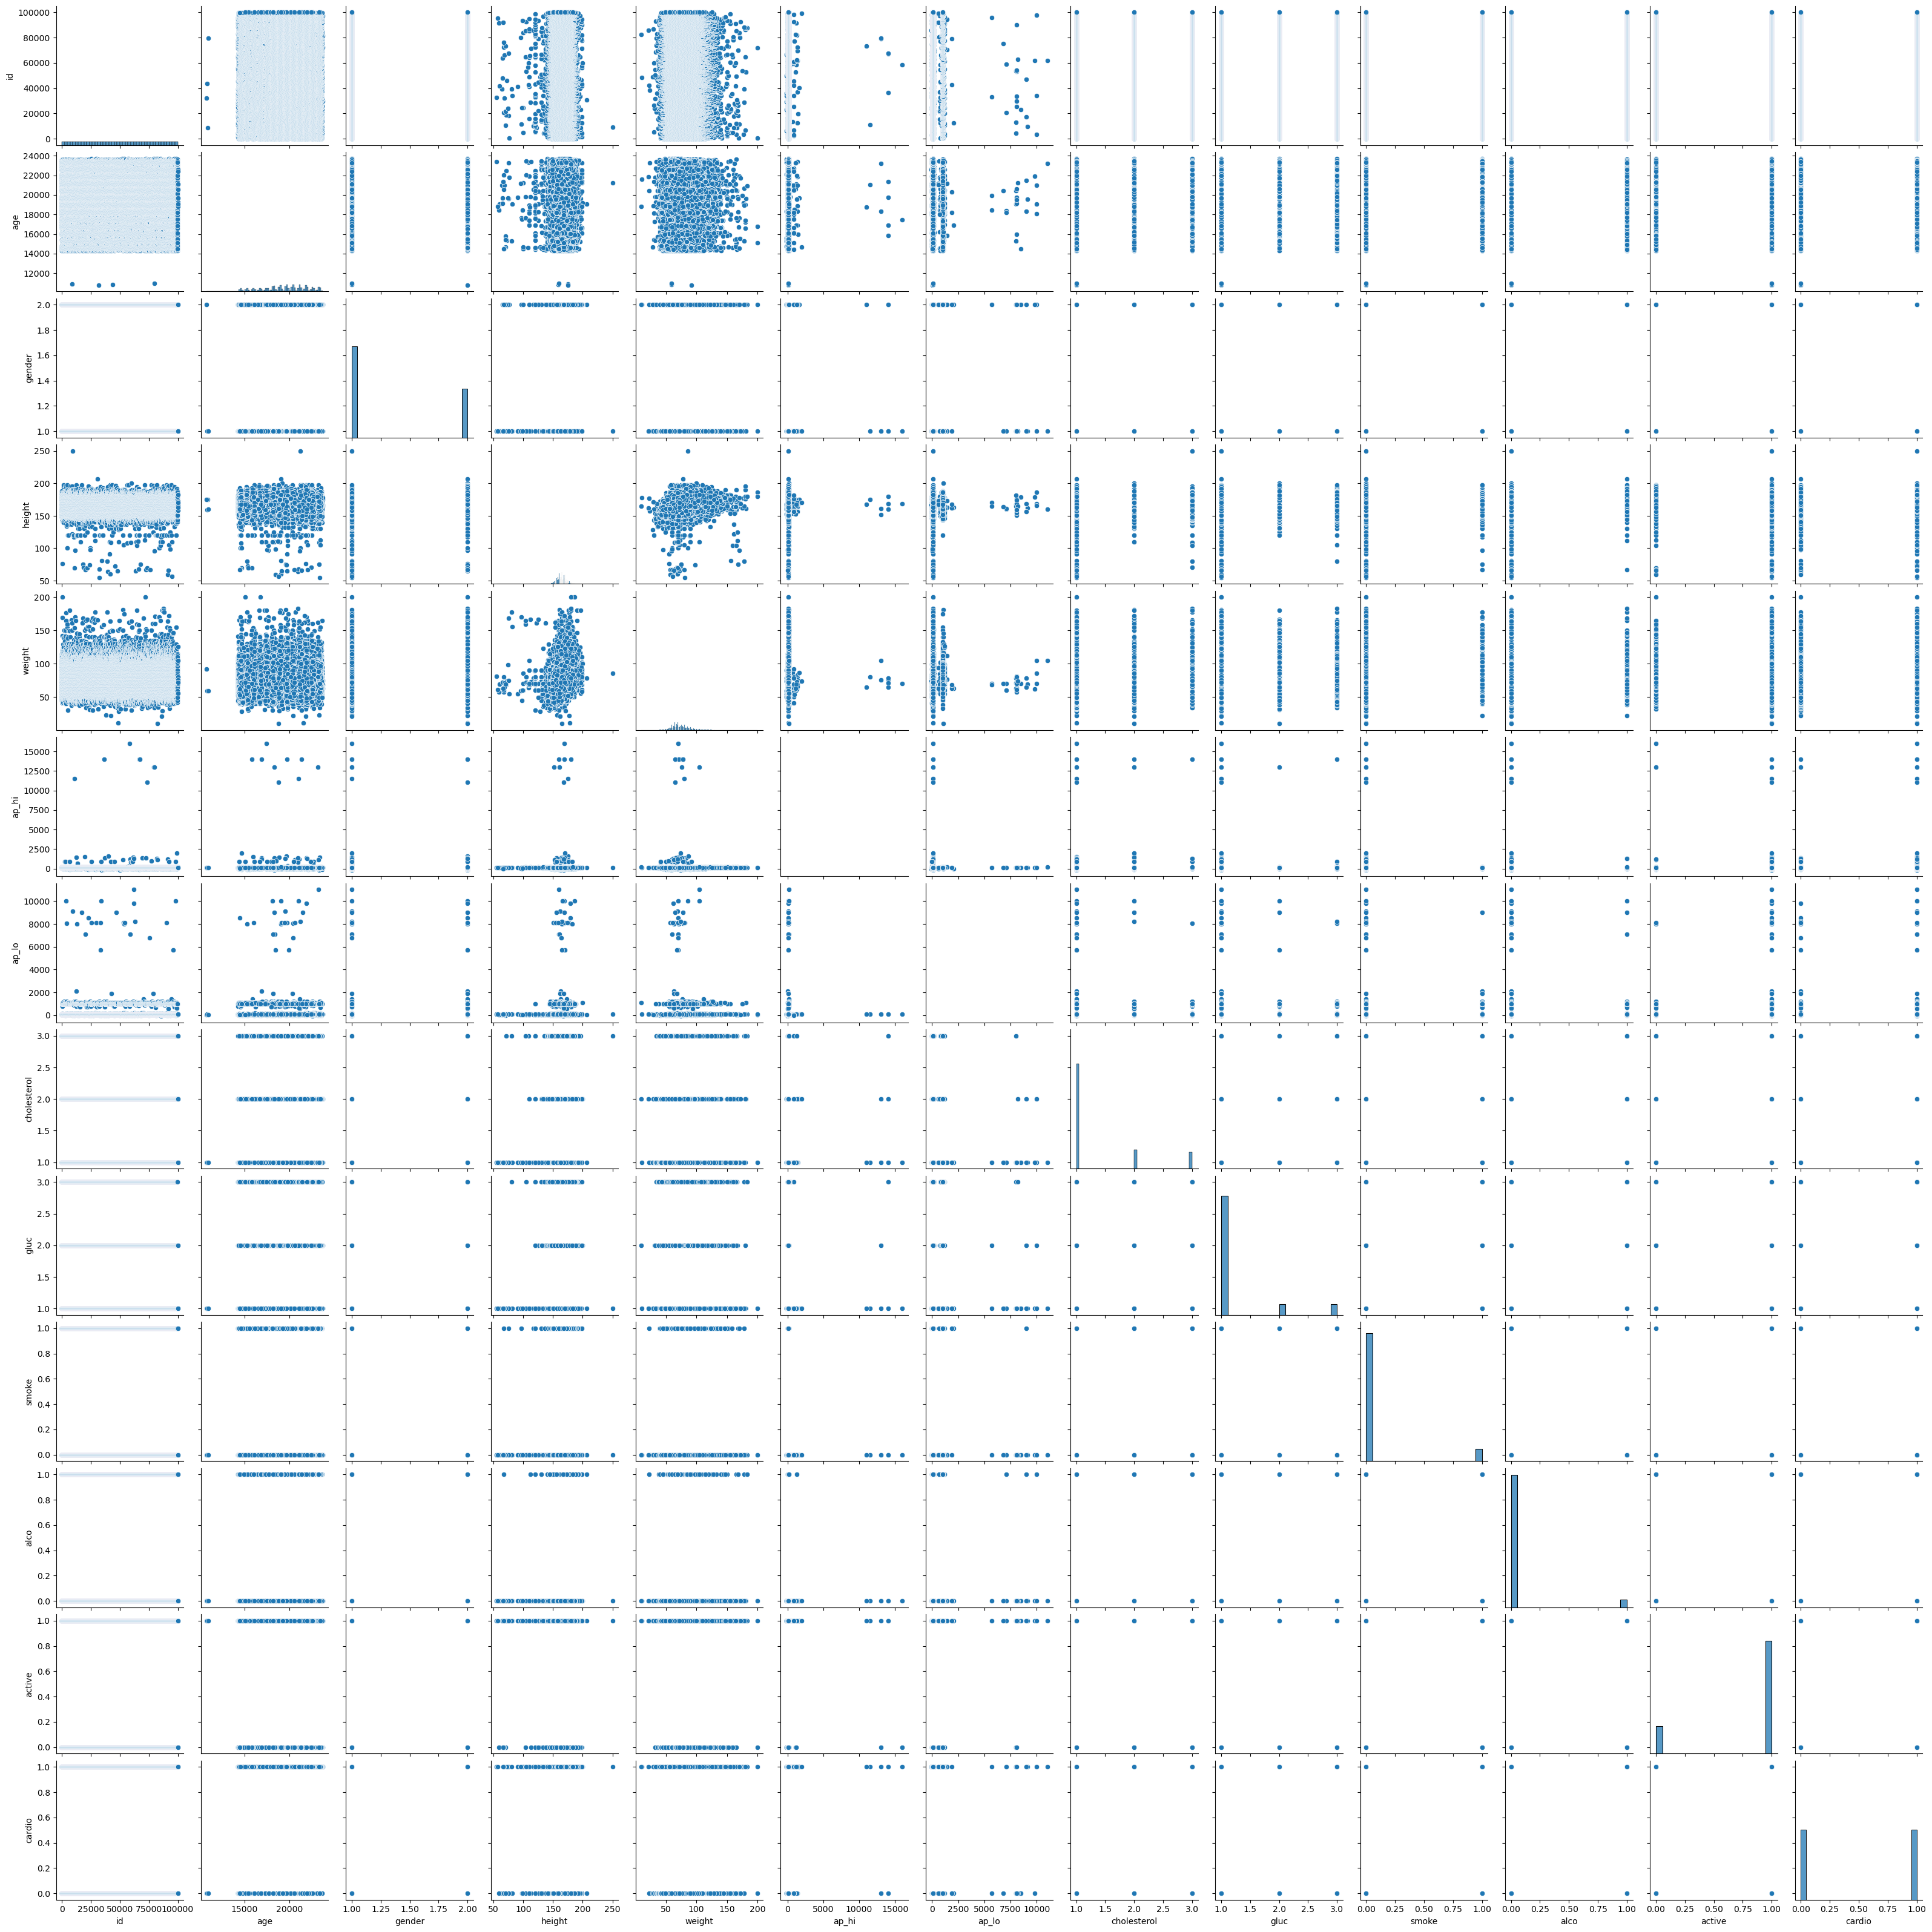

In [24]:
sns.pairplot(data)